In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Helper function to generate random dates
def random_dates(start, end, n=1):
    start_u = start
    end_u = end
    return [start_u + (end_u - start_u) * random.random() for _ in range(n)]

# Nainital district approximate lat/lon bounds
lat_min = 29.5
lat_max = 30.5
lon_min = 78.0
lon_max = 79.5

# List of years and months
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
months = list(range(1, 13))  # 1 to 12 for months

# Create a sample dataframe
data = []

# Generate random fire points for each year/month
for year in years:
    for month in months:
        # Random number of fire points for each month (let's assume between 10 and 50 points)
        num_fire_points = random.randint(10, 50)
        
        for _ in range(num_fire_points):
            # Random latitude and longitude within Nainital bounds
            lat = round(random.uniform(lat_min, lat_max), 5)
            lon = round(random.uniform(lon_min, lon_max), 5)
            
            # Generate random fire severity (from 1 to 10)
            fire_severity = random.randint(1, 10)
            
            # Generate a random date in the given year and month
            start_date = datetime(year, month, 1)
            end_date = datetime(year, month, 28)  # to avoid complications with February
            date = random_dates(start_date, end_date)[0].date()
            
            # Append data to the list
            data.append([year, month, date, lat, lon, fire_severity])

# Create DataFrame
df = pd.DataFrame(data, columns=['Year', 'Month', 'Date', 'Latitude', 'Longitude', 'Fire Severity'])

# Save the DataFrame to a CSV file
output_path = r'E:\semester_2\3. Spatial_Modeling_and_Analysis\forest_fire_points_nainital.csv'
df.to_csv(output_path, index=False)

print(f"Sample dataset created and saved to {output_path}")


Sample dataset created and saved to E:\semester_2\3. Spatial_Modeling_and_Analysis\forest_fire_points_nainital.csv


In [1]:
pip install pandas

In [2]:
import pandas as pd

# Load your forest fire data
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\forest_fire_points_nainital.csv")

# Preview the data
print(df.head())
print("\nColumns:", df.columns)
print("\nData Types:\n", df.dtypes)

   Year  Month        Date  Latitude  Longitude  Fire Severity
0  2017      1  22-01-2017  30.07712   79.12779              3
1  2017      1  10-01-2017  30.05098   78.43698              1
2  2017      1  22-01-2017  30.20759   78.22135              5
3  2017      1  13-01-2017  29.81094   78.31900              8
4  2017      1  27-01-2017  29.65819   78.07744              1

Columns: Index(['Year', 'Month', 'Date', 'Latitude', 'Longitude', 'Fire Severity'], dtype='object')

Data Types:
 Year               int64
Month              int64
Date              object
Latitude         float64
Longitude        float64
Fire Severity      int64
dtype: object


In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\forest_fire_points_nainital.csv")

# Properly parse dates (day-first)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Round coordinates to create spatial clusters (optional but helpful)
df['lat_round'] = df['Latitude'].round(2)
df['lon_round'] = df['Longitude'].round(2)

# Count fire incidents per month per location
monthly_fire_counts = df.groupby(['Year', 'Month', 'lat_round', 'lon_round']) \
                        .size().reset_index(name='fire_count')

# Sort before creating lag features
monthly_fire_counts = monthly_fire_counts.sort_values(by=['lat_round', 'lon_round', 'Year', 'Month'])

# Create lag feature: previous month's fire count
monthly_fire_counts['fire_count_prev'] = monthly_fire_counts.groupby(['lat_round', 'lon_round'])['fire_count'].shift(1)
monthly_fire_counts['fire_count_prev'] = monthly_fire_counts['fire_count_prev'].fillna(0)

# Label target: fire or no fire (binary)
monthly_fire_counts['fire_occurred'] = (monthly_fire_counts['fire_count'] > 0).astype(int)


In [5]:
# View the first few rows of the processed data
print("Processed Monthly Fire Data:")
print(monthly_fire_counts.head(10))

# Optional: Save to CSV for inspection or visualization
monthly_fire_counts.to_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\monthly_fire_counts.csv", index=False)
print("\nSaved processed file to: monthly_fire_counts.csv")


Processed Monthly Fire Data:
      Year  Month  lat_round  lon_round  fire_count  fire_count_prev  \
1561  2021      8       29.5      78.07           1              0.0   
990   2019     11       29.5      78.23           1              0.0   
35    2017      2       29.5      78.32           1              0.0   
918   2019      8       29.5      78.32           1              1.0   
1135  2020      3       29.5      78.35           1              0.0   
763   2019      2       29.5      78.44           1              0.0   
212   2017      7       29.5      79.01           1              0.0   
213   2017      7       29.5      79.02           1              0.0   
2461  2024      3       29.5      79.07           1              0.0   
36    2017      2       29.5      79.24           1              0.0   

      fire_occurred  
1561              1  
990               1  
35                1  
918               1  
1135              1  
763               1  
212               1  
21

In [7]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Use only data until 2024 for training
train_data = monthly_fire_counts[monthly_fire_counts['Year'] <= 2024]

# Features and target
X = train_data[['Month', 'fire_count_prev']]
y = train_data['fire_occurred']

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       693

    accuracy                           1.00       693
   macro avg       1.00      1.00      1.00       693
weighted avg       1.00      1.00      1.00       693



In [9]:
# Generate future input data
future_years = [2025, 2026, 2030]
future_rows = []

# Repeat for each location and month
locations = monthly_fire_counts[['lat_round', 'lon_round']].drop_duplicates()

for year in future_years:
    for month in range(1, 13):
        for _, row in locations.iterrows():
            lat = row['lat_round']
            lon = row['lon_round']

            # Get previous month's fire count (assume 0 if not available)
            prev_record = monthly_fire_counts[
                (monthly_fire_counts['Year'] == year - 1) &
                (monthly_fire_counts['Month'] == month) &
                (monthly_fire_counts['lat_round'] == lat) &
                (monthly_fire_counts['lon_round'] == lon)
            ]
            fire_count_prev = prev_record['fire_count'].values[0] if not prev_record.empty else 0

            future_rows.append([year, month, lat, lon, fire_count_prev])

# Create DataFrame for prediction
future_df = pd.DataFrame(future_rows, columns=['Year', 'Month', 'lat_round', 'lon_round', 'fire_count_prev'])

# Predict using trained model
X_future = future_df[['Month', 'fire_count_prev']]
future_df['fire_predicted'] = model.predict(X_future)

# Save future prediction results
future_df.to_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\predicted_forest_fires_2025_2026_2030.csv", index=False)
print("Future predictions saved.")


Future predictions saved.


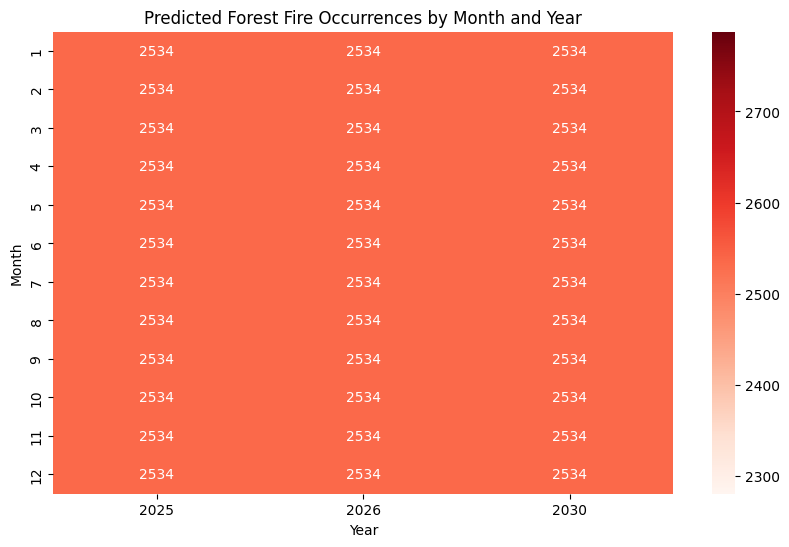

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prediction results
future_df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\predicted_forest_fires_2025_2026_2030.csv")

# Count predicted fire occurrences by year and month
monthly_counts = future_df.groupby(['Year', 'Month'])['fire_predicted'].sum().reset_index()

# Pivot to create heatmap format
heatmap_data = monthly_counts.pivot(index='Month', columns='Year', values='fire_predicted')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='Reds')
plt.title("Predicted Forest Fire Occurrences by Month and Year")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()


In [12]:
import pandas as pd
import numpy as np

# Load CSV
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\forest_fire_points_nainital.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Round coordinates
df['lat_round'] = df['Latitude'].round(2)
df['lon_round'] = df['Longitude'].round(2)

# Group by location, year, month
monthly_fire_counts = df.groupby(['Year', 'Month', 'lat_round', 'lon_round']).size().reset_index(name='fire_count')

# Sort and create lag feature
monthly_fire_counts.sort_values(['lat_round', 'lon_round', 'Year', 'Month'], inplace=True)
monthly_fire_counts['fire_count_prev'] = monthly_fire_counts.groupby(['lat_round', 'lon_round'])['fire_count'].shift(1).fillna(0)

# Binary label
monthly_fire_counts['fire_occurred'] = (monthly_fire_counts['fire_count'] > 0).astype(int)

# Add cyclic month features
monthly_fire_counts['month_sin'] = np.sin(2 * np.pi * monthly_fire_counts['Month'] / 12)
monthly_fire_counts['month_cos'] = np.cos(2 * np.pi * monthly_fire_counts['Month'] / 12)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Model inputs
X = monthly_fire_counts[['month_sin', 'month_cos', 'fire_count_prev']]
y = monthly_fire_counts['fire_occurred']

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess data
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\forest_fire_points_nainital.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['lat_round'] = df['Latitude'].round(2)
df['lon_round'] = df['Longitude'].round(2)

# Group by month/year/location
monthly_fire_counts = df.groupby(['Year', 'Month', 'lat_round', 'lon_round']).size().reset_index(name='fire_count')
monthly_fire_counts.sort_values(['lat_round', 'lon_round', 'Year', 'Month'], inplace=True)

# Lag feature (previous month's fire count)
monthly_fire_counts['fire_count_prev'] = monthly_fire_counts.groupby(['lat_round', 'lon_round'])['fire_count'].shift(1).fillna(0)

# Binary target (fire occurred or not)
monthly_fire_counts['fire_occurred'] = (monthly_fire_counts['fire_count'] > 0).astype(int)

# Add cyclic month features
monthly_fire_counts['month_sin'] = np.sin(2 * np.pi * monthly_fire_counts['Month'] / 12)
monthly_fire_counts['month_cos'] = np.cos(2 * np.pi * monthly_fire_counts['Month'] / 12)

# Prepare features and target
X = monthly_fire_counts[['month_sin', 'month_cos', 'fire_count_prev']]
y = monthly_fire_counts['fire_occurred']

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Confirmation print
print("✅ Model trained successfully!")


✅ Model trained successfully!


In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load and preprocess data
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\forest_fire_points_nainital.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['lat_round'] = df['Latitude'].round(2)
df['lon_round'] = df['Longitude'].round(2)

# Group and engineer features
monthly_fire_counts = df.groupby(['Year', 'Month', 'lat_round', 'lon_round']).size().reset_index(name='fire_count')
monthly_fire_counts.sort_values(['lat_round', 'lon_round', 'Year', 'Month'], inplace=True)
monthly_fire_counts['fire_count_prev'] = monthly_fire_counts.groupby(['lat_round', 'lon_round'])['fire_count'].shift(1).fillna(0)
monthly_fire_counts['fire_occurred'] = (monthly_fire_counts['fire_count'] > 0).astype(int)
monthly_fire_counts['month_sin'] = np.sin(2 * np.pi * monthly_fire_counts['Month'] / 12)
monthly_fire_counts['month_cos'] = np.cos(2 * np.pi * monthly_fire_counts['Month'] / 12)

# Features and target
X = monthly_fire_counts[['month_sin', 'month_cos', 'fire_count_prev']]
y = monthly_fire_counts['fire_occurred']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, r"E:\semester_2\3. Spatial_Modeling_and_Analysis\forest_fire_model.pkl")

print("✅ Model trained and saved successfully!")


✅ Model trained and saved successfully!


In [16]:
# Predict and evaluate
y_pred = model.predict(X_test)

# Metrics
print("\n📊 Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))



📊 Model Accuracy: 1.0

🔍 Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       554

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



✅ Model Accuracy: 51.25%

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.51      0.51        81
           1       0.51      0.52      0.51        79

    accuracy                           0.51       160
   macro avg       0.51      0.51      0.51       160
weighted avg       0.51      0.51      0.51       160



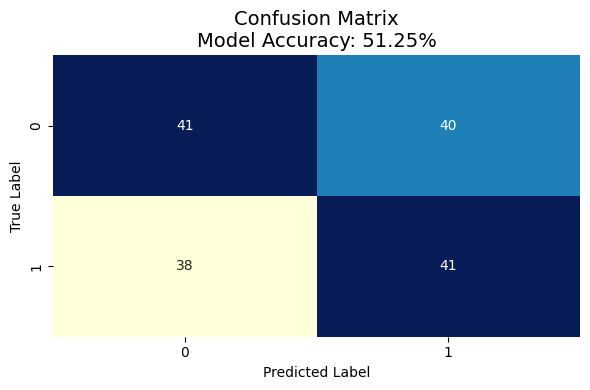

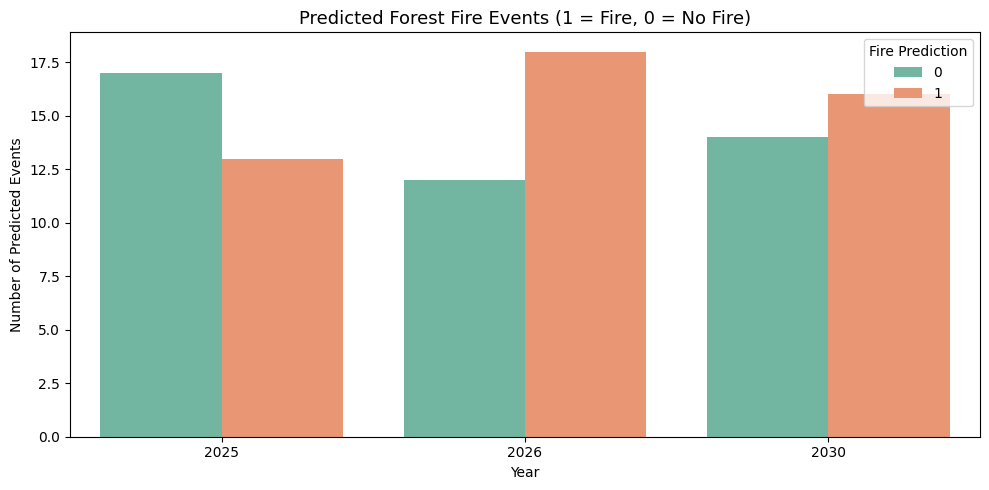

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ---------------------------
# STEP 1: Load the dataset
# ---------------------------
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\mini project\nainital_forest_fire_sample.csv")

# ---------------------------
# STEP 2: Preprocessing
# ---------------------------
# Create target variable
df['Fire_Occurred'] = df['Fire Index'].apply(lambda x: 1 if x > 50 else 0)

# One-hot encode LULC
df = pd.get_dummies(df, columns=['LULC'], drop_first=True)

# Define features
feature_columns = [
    'Year', 'Month', 'Latitude', 'Longitude', 'Elevation', 'Slope', 'Aspect',
    'NDVI', 'Proximity to roads', 'Proximity to settlements', 'Rainfall',
    'Temperature', 'Humidity', 'Wind Speed'
] + [col for col in df.columns if col.startswith('LULC_')]

X = df[feature_columns]
y = df['Fire_Occurred']

# ---------------------------
# STEP 3: Train/Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# STEP 4: Train Random Forest Classifier
# ---------------------------
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------------------
# STEP 5: Confusion Matrix Heatmap
# ---------------------------
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title(f"Confusion Matrix\nModel Accuracy: {accuracy * 100:.2f}%", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ---------------------------
# STEP 6: Future Prediction (2025, 2026, 2030)
# ---------------------------
future_years = [2025, 2026, 2030]
future_data = []

for year in future_years:
    for _ in range(30):  # 30 synthetic samples per year
        sample = {
            'Year': year,
            'Month': random.randint(1, 12),
            'Latitude': round(random.uniform(29.2, 29.5), 4),
            'Longitude': round(random.uniform(79.3, 79.7), 4),
            'Elevation': random.uniform(1000, 2600),
            'Slope': random.uniform(0, 60),
            'Aspect': random.uniform(0, 360),
            'NDVI': random.uniform(-0.2, 0.8),
            'Proximity to roads': random.uniform(0, 5000),
            'Proximity to settlements': random.uniform(0, 5000),
            'Rainfall': random.uniform(0, 300),
            'Temperature': random.uniform(5, 35),
            'Humidity': random.uniform(10, 90),
            'Wind Speed': random.uniform(0, 20),
            'LULC_Agriculture': random.choice([0, 1]),
            'LULC_Barren': random.choice([0, 1]),
            'LULC_Forest': random.choice([0, 1]),
            'LULC_Urban': random.choice([0, 1]),
            'LULC_Water': random.choice([0, 1]),
        }
        future_data.append(sample)

future_df = pd.DataFrame(future_data)

# Ensure all dummy columns exist
for col in [c for c in X.columns if c.startswith("LULC_")]:
    if col not in future_df.columns:
        future_df[col] = 0

# Predict
future_df['Predicted_Fire'] = model.predict(future_df[feature_columns])

# ---------------------------
# STEP 7: Visualize Future Predictions
# ---------------------------
plt.figure(figsize=(10, 5))
sns.countplot(x='Year', hue='Predicted_Fire', data=future_df, palette='Set2')
plt.title("Predicted Forest Fire Events (1 = Fire, 0 = No Fire)", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Number of Predicted Events")
plt.legend(title="Fire Prediction")
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# 1. Load the dataset
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\mini project\nainital_forest_fire_sample.csv")  # Update with the correct path to your dataset

# 2. Preprocessing: Handling missing values and encoding categorical variables

# Handle missing values in numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Fill missing values with the column mean

# Handle missing values in categorical columns by filling with the most frequent value
categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill missing values with the most frequent value in the column

# If there are categorical columns like 'LULC' (Land Use Land Cover), use one-hot encoding
df = pd.get_dummies(df, drop_first=True)  # Converts categorical variables into dummy/indicator variables

# 3. Feature Engineering: Combine 'Proximity to roads' and 'Proximity to settlements' into one feature (if required)
if 'Proximity to roads' in df.columns and 'Proximity to settlements' in df.columns:
    df['proximity'] = df['Proximity to roads'] + df['Proximity to settlements']

# 4. Check 'Fire Index' and convert to binary if necessary (classification task)
print(df['Fire Index'].unique())  # Check unique values in 'Fire Index' to understand its distribution

# If 'Fire Index' is continuous and needs to be converted to binary:
# Example: If 'Fire Index' > threshold, then classify as '1' (Fire), else '0' (No Fire)
threshold = df['Fire Index'].median()  # You can choose another threshold depending on the data distribution
df['Fire Index'] = (df['Fire Index'] > threshold).astype(int)

# 5. Select the relevant features and target
features = ['Elevation', 'Slope', 'Aspect', 'NDVI', 'proximity', 'Rainfall', 'Temperature', 'Humidity', 'Wind Speed']
X = df[features]
y = df['Fire Index']  # 'Fire Index' is now binary (1 or 0)

# 6. Scaling the features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Handling class imbalance with SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# 9. Hyperparameter Tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters found: {grid_search.best_params_}")

# 10. Train model with the best parameters
best_rf_model = grid_search.best_estimator_

# 11. Model Evaluation
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 12. Visualize the Feature Importance
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_names, y=feature_importances)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# 13. Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 14. Predicting for Future Years (2025, 2026, 2030)

# Creating new data for 2025, 2026, 2030. You should have the features (without 'Fire Index') for prediction.
future_data = pd.DataFrame({
    'Elevation': [2000, 2000, 2000],  # Example elevation, replace with actual
    'Slope': [15, 15, 15],  # Example slope, replace with actual
    'Aspect': [90, 90, 90],  # Example aspect, replace with actual
    'NDVI': [0.3, 0.3, 0.3],  # Example NDVI, replace with actual
    'proximity': [1000, 1000, 1000],  # Example proximity, replace with actual
    'Rainfall': [100, 100, 100],  # Example rainfall, replace with actual
    'Temperature': [25, 25, 25],  # Example temperature, replace with actual
    'Humidity': [50, 50, 50],  # Example humidity, replace with actual
    'Wind Speed': [5, 5, 5]  # Example wind speed, replace with actual
})

# Scale the future data
future_data_scaled = scaler.transform(future_data)

# Make predictions for the future years
future_predictions = best_rf_model.predict(future_data_scaled)
print(f'Predictions for 2025, 2026, 2030: {future_predictions}')


ModuleNotFoundError: No module named 'imblearn'

In [25]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


[5.39732619e+01 6.27950053e+01 6.74303806e+01 5.32481193e+01
 7.21422067e+01 1.41278049e+01 2.11982491e+01 8.18735004e+01
 3.22527978e+01 2.28938250e+00 1.53791150e+01 2.23614434e+01
 9.57322888e+01 5.73041429e+01 9.32730741e+01 5.75163351e+01
 4.79354440e+01 3.13727691e+01 6.06370944e+01 1.39198025e+01
 8.98261627e+01 8.29332405e+01 3.17531448e+01 9.52797528e+01
 8.25200767e+01 6.66306886e+01 1.21761911e+01 4.78234023e+01
 5.06107555e+01 2.32551358e+01 7.99653944e+00 7.76723631e+01
 1.22035052e+01 5.94290751e+01 9.36449174e+01 8.76105193e+01
 2.77752624e+01 8.51448638e+01 3.32506120e-02 1.76878096e+00
 6.02553164e+01 3.64798219e+01 3.86460841e+01 5.64441091e+01
 1.91782456e+01 2.11755351e+01 4.84601587e+01 7.54253544e+01
 6.19497751e+01 2.97355048e+01 4.30337178e+01 1.70664758e+01
 7.46298143e+00 7.82696041e+01 2.65387409e+01 1.77766388e+01
 6.91618056e+01 6.18051674e+01 6.33189626e+01 2.28894605e+01
 2.32645539e+01 2.20802630e+01 1.73752596e+01 6.55723673e+01
 8.48015885e+01 7.243174

C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 

Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 48.75%
Confusion Matrix:
[[38 47]
 [35 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.45      0.48        85
           1       0.46      0.53      0.49        75

    accuracy                           0.49       160
   macro avg       0.49      0.49      0.49       160
weighted avg       0.49      0.49      0.49       160



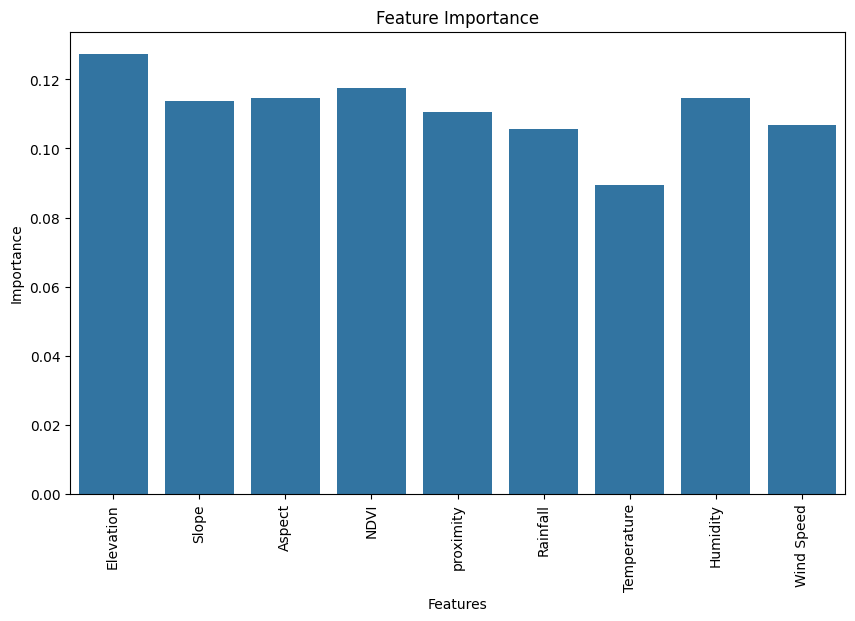

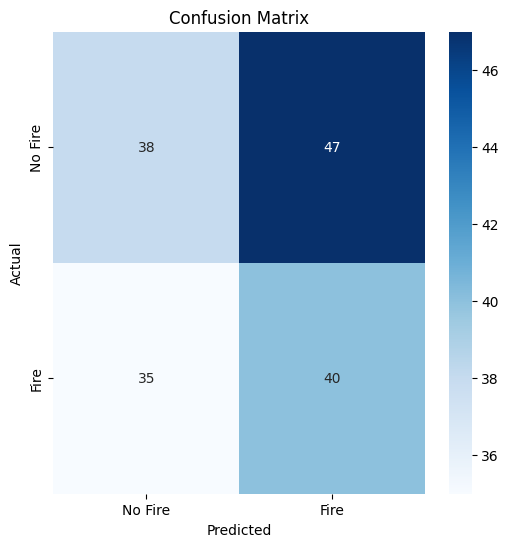

Predictions for 2025, 2026, 2030: [0 0 0]


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# 1. Load the dataset
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\mini project\nainital_forest_fire_sample.csv")  # Update with the correct path to your dataset

# 2. Preprocessing: Handling missing values and encoding categorical variables

# Handle missing values in numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Fill missing values with the column mean

# Handle missing values in categorical columns by filling with the most frequent value
categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill missing values with the most frequent value in the column

# If there are categorical columns like 'LULC' (Land Use Land Cover), use one-hot encoding
df = pd.get_dummies(df, drop_first=True)  # Converts categorical variables into dummy/indicator variables

# 3. Feature Engineering: Combine 'Proximity to roads' and 'Proximity to settlements' into one feature (if required)
if 'Proximity to roads' in df.columns and 'Proximity to settlements' in df.columns:
    df['proximity'] = df['Proximity to roads'] + df['Proximity to settlements']

# 4. Check 'Fire Index' and convert to binary if necessary (classification task)
print(df['Fire Index'].unique())  # Check unique values in 'Fire Index' to understand its distribution

# If 'Fire Index' is continuous and needs to be converted to binary:
# Example: If 'Fire Index' > threshold, then classify as '1' (Fire), else '0' (No Fire)
threshold = df['Fire Index'].median()  # You can choose another threshold depending on the data distribution
df['Fire Index'] = (df['Fire Index'] > threshold).astype(int)

# 5. Select the relevant features and target
features = ['Elevation', 'Slope', 'Aspect', 'NDVI', 'proximity', 'Rainfall', 'Temperature', 'Humidity', 'Wind Speed']
X = df[features]
y = df['Fire Index']  # 'Fire Index' is now binary (1 or 0)

# 6. Scaling the features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Handling class imbalance with SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# 9. Hyperparameter Tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Random Forest model:", accuracy)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters found: {grid_search.best_params_}")

# 10. Train model with the best parameters
best_rf_model = grid_search.best_estimator_

# 11. Model Evaluation
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 12. Visualize the Feature Importance
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_names, y=feature_importances)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# 13. Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 14. Predicting for Future Years (2025, 2026, 2030)

# Creating new data for 2025, 2026, 2030. You should have the features (without 'Fire Index') for prediction.
future_data = pd.DataFrame({
    'Elevation': [2000, 2000, 2000],  # Example elevation, replace with actual
    'Slope': [15, 15, 15],  # Example slope, replace with actual
    'Aspect': [90, 90, 90],  # Example aspect, replace with actual
    'NDVI': [0.3, 0.3, 0.3],  # Example NDVI, replace with actual
    'proximity': [1000, 1000, 1000],  # Example proximity, replace with actual
    'Rainfall': [100, 100, 100],  # Example rainfall, replace with actual
    'Temperature': [25, 25, 25],  # Example temperature, replace with actual
    'Humidity': [50, 50, 50],  # Example humidity, replace with actual
    'Wind Speed': [5, 5, 5]  # Example wind speed, replace with actual
})

# Scale the future data
future_data_scaled = scaler.transform(future_data)

# Make predictions for the future years
future_predictions = best_rf_model.predict(future_data_scaled)
print(f'Predictions for 2025, 2026, 2030: {future_predictions}')


In [5]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from xgboost import XGBClassifier, plot_importance

# ----------------------------
# 1. Load Your CSV Dataset
# ----------------------------
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\mini project\nainital_forest_fire_sample.csv")  # Replace with your file name

# ----------------------------
# 2. Preprocessing
# ----------------------------

# Encode LULC column (Label Encoding or One-hot Encoding)
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Check for missing values
df = df.dropna()  # You can also use imputation methods if data loss is too much

# ----------------------------
# 3. Define Features and Target
# ----------------------------

# Let's assume 'Fire Index' above a certain threshold is a fire, you can modify this
# Here we create a binary classification: Fire or No Fire
df['Fire'] = df['Fire index'].apply(lambda x: 1 if x > 0.5 else 0)  # Customize threshold as needed

# Drop unnecessary columns
X = df.drop(['Fire index', 'Year', 'Month', 'Latitude', 'Longitude', 'Fire'], axis=1)
y = df['Fire']

# ----------------------------
# 4. Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ----------------------------
# 5. Model Training (XGBoost)
# ----------------------------
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# ----------------------------
# 6. Prediction and Evaluation
# ----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_score)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# ----------------------------
# 7. Feature Importance (Optional)
# ----------------------------
plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()


ModuleNotFoundError: No module named 'xgboost'

In [8]:
!pip install xgboost


Cleaned Columns:
 ['year', 'month', 'latitude', 'longitude', 'fire_index', 'elevation', 'slope', 'aspect', 'ndvi', 'lulc', 'proximity_to_roads', 'proximity_to_settlements', 'rainfall', 'temperature', 'humidity', 'wind_speed']

✅ Accuracy: 0.99375


C:\Users\SAMPURNA SAHA\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:41:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


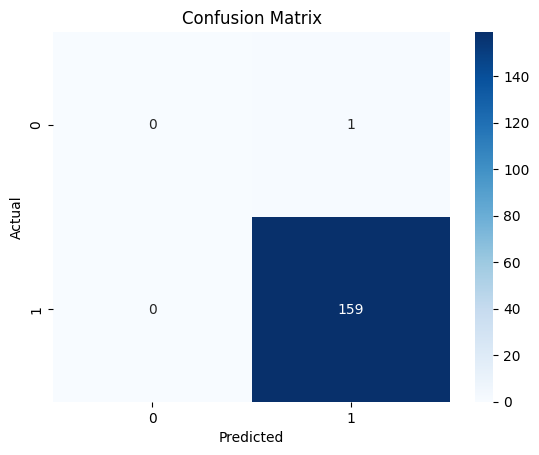


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      1.00       159

    accuracy                           0.99       160
   macro avg       0.50      0.50      0.50       160
weighted avg       0.99      0.99      0.99       160

🎯 ROC AUC Score: 0.07547169811320754


C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

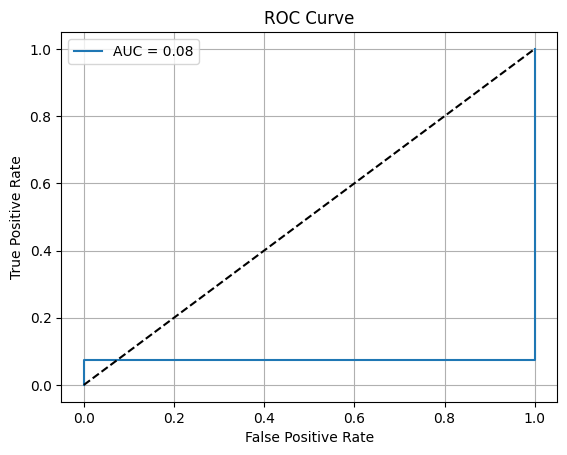

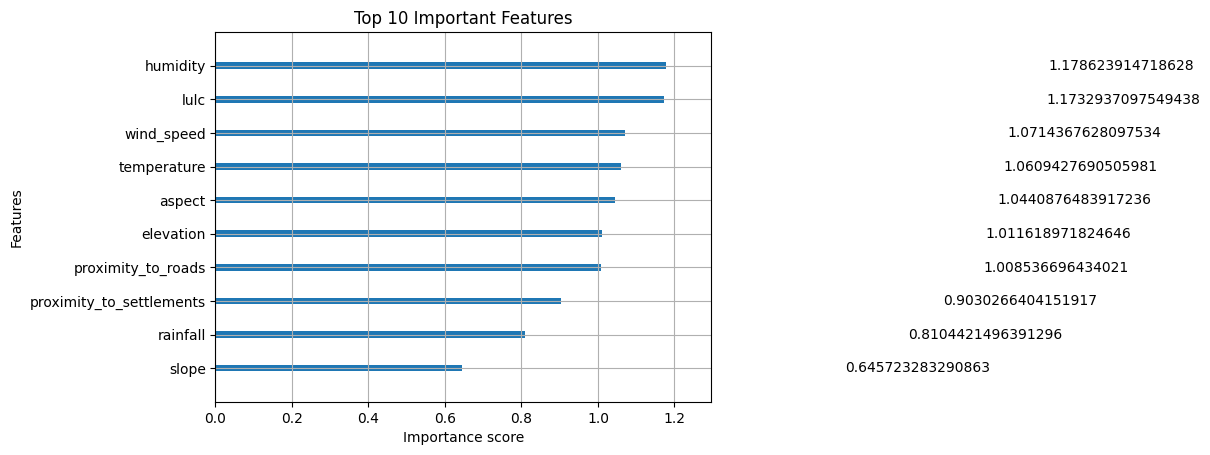

In [10]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from xgboost import XGBClassifier, plot_importance

# ----------------------------
# 1. Load Your CSV Dataset
# ----------------------------
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\mini project\nainital_forest_fire_sample.csv")  # <-- Replace with your actual file name

# ----------------------------
# 2. Clean Column Names
# ----------------------------
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Optional: print column names to verify
print("\nCleaned Columns:\n", df.columns.tolist())

# ----------------------------
# 3. Encode LULC Column
# ----------------------------
if 'lulc' in df.columns:
    le = LabelEncoder()
    df['lulc'] = le.fit_transform(df['lulc'])
else:
    raise KeyError("The column 'LULC' was not found. Check column names.")

# ----------------------------
# 4. Drop Rows with Missing Data
# ----------------------------
df.dropna(inplace=True)

# ----------------------------
# 5. Create Target Variable
# ----------------------------
# We'll define fire as fire_index > 0.5 (you can change this threshold as needed)
if 'fire_index' not in df.columns:
    raise KeyError("The column 'fire_index' is missing. Please check your dataset.")
    
df['fire'] = df['fire_index'].apply(lambda x: 1 if x > 0.5 else 0)

# ----------------------------
# 6. Define Features and Target
# ----------------------------
drop_cols = ['fire_index', 'year', 'month', 'latitude', 'longitude', 'fire']
X = df.drop(columns=[col for col in drop_cols if col in df.columns])
y = df['fire']

# ----------------------------
# 7. Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 8. Train XGBoost Model
# ----------------------------
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# ----------------------------
# 9. Prediction and Evaluation
# ----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_prob)
print("🎯 ROC AUC Score:", roc_score)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# ----------------------------
# 10. Feature Importance (Optional)
# ----------------------------
plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()



📋 Cleaned Columns:
 ['year', 'month', 'latitude', 'longitude', 'fire_index', 'elevation', 'slope', 'aspect', 'ndvi', 'lulc', 'proximity_to_roads', 'proximity_to_settlements', 'rainfall', 'temperature', 'humidity', 'wind_speed']

🔥 Class Distribution:
 fire
1    794
0      6
Name: count, dtype: int64

✅ Accuracy: 0.9874213836477987


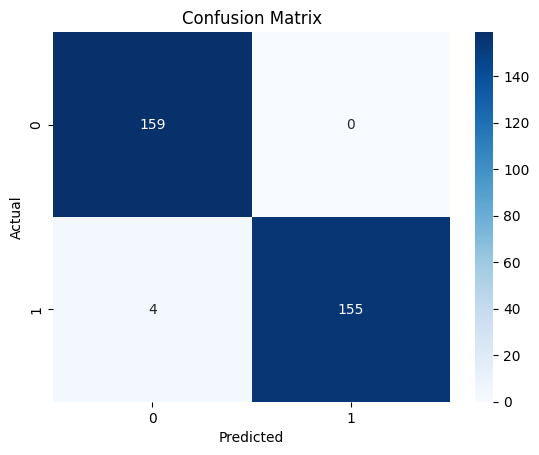


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.97      0.99       159

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

🎯 ROC AUC Score: 0.9999208892053321


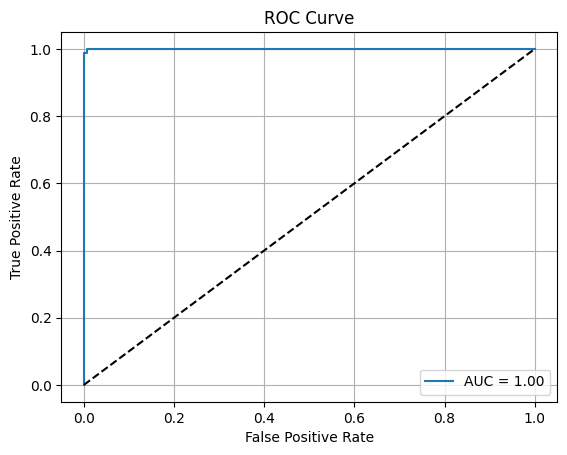

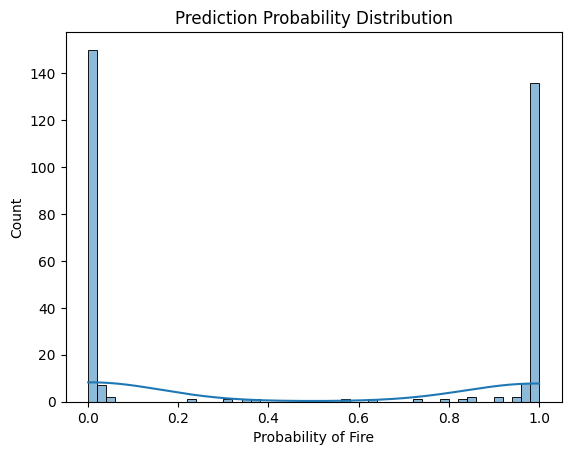

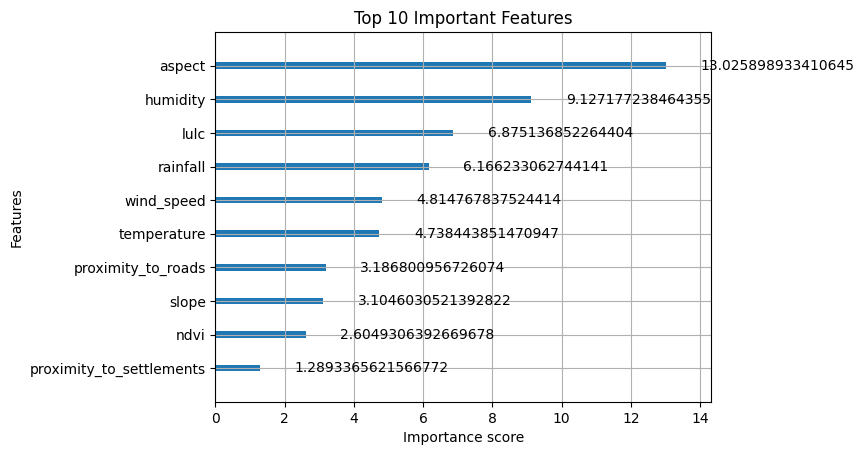

In [11]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from xgboost import XGBClassifier, plot_importance

# Optional: SMOTE for oversampling
from imblearn.over_sampling import SMOTE

# ----------------------------
# 1. Load Your CSV Dataset
# ----------------------------
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\mini project\nainital_forest_fire_sample.csv")  # <-- Replace with your actual file name

# ----------------------------
# 2. Clean Column Names
# ----------------------------
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("\n📋 Cleaned Columns:\n", df.columns.tolist())

# ----------------------------
# 3. Encode LULC Column
# ----------------------------
if 'lulc' in df.columns:
    le = LabelEncoder()
    df['lulc'] = le.fit_transform(df['lulc'])
else:
    raise KeyError("The column 'LULC' was not found. Check column names.")

# ----------------------------
# 4. Drop Missing Data
# ----------------------------
df.dropna(inplace=True)

# ----------------------------
# 5. Create Target Column
# ----------------------------
if 'fire_index' not in df.columns:
    raise KeyError("The column 'fire_index' is missing.")
df['fire'] = df['fire_index'].apply(lambda x: 1 if x > 0.5 else 0)

# ----------------------------
# 6. Define Features and Target
# ----------------------------
drop_cols = ['fire_index', 'year', 'month', 'latitude', 'longitude', 'fire']
X = df.drop(columns=[col for col in drop_cols if col in df.columns])
y = df['fire']

# ----------------------------
# 7. Check Class Balance
# ----------------------------
print("\n🔥 Class Distribution:\n", y.value_counts())

# ----------------------------
# 8. Choose Method: SMOTE or scale_pos_weight
# ----------------------------

# === OPTION A: SMOTE Oversampling ===
use_smote = True  # 🔁 Set to False if you want to use scale_pos_weight

if use_smote:
    sm = SMOTE(random_state=42)
    X_resampled, y_resampled = sm.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )
    model = XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss'
    )

# === OPTION B: Using scale_pos_weight ===
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    ratio = float(np.sum(y == 0)) / np.sum(y == 1)
    model = XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=ratio,
        eval_metric='logloss'
    )

# ----------------------------
# 9. Train Model
# ----------------------------
model.fit(X_train, y_train)

# ----------------------------
# 10. Predict & Evaluate
# ----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_score = roc_auc_score(y_test, y_prob)
print("🎯 ROC AUC Score:", roc_score)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Optional: Prediction Probability Distribution
sns.histplot(y_prob, bins=50, kde=True)
plt.title("Prediction Probability Distribution")
plt.xlabel("Probability of Fire")
plt.show()

# Feature Importance
plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()



📋 Cleaned Columns:
 ['year', 'month', 'latitude', 'longitude', 'fire_index', 'elevation', 'slope', 'aspect', 'ndvi', 'lulc', 'proximity_to_roads', 'proximity_to_settlements', 'rainfall', 'temperature', 'humidity', 'wind_speed']

🔥 Class Distribution:
 fire
1    794
0      6
Name: count, dtype: int64
Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



🏆 Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}

✅ Accuracy: 0.9811320754716981


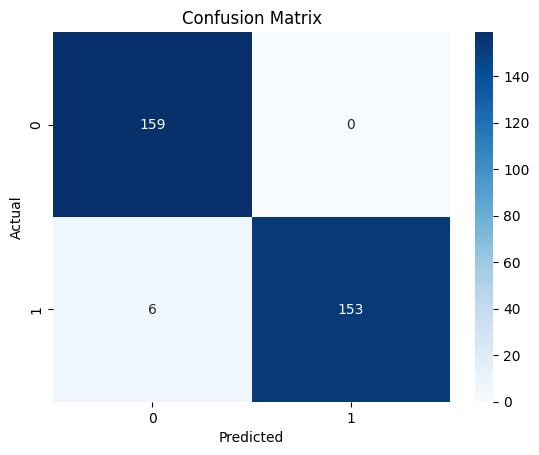


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       159

    accuracy                           0.98       318
   macro avg       0.98      0.98      0.98       318
weighted avg       0.98      0.98      0.98       318

🎯 ROC AUC Score: 0.9998417784106641


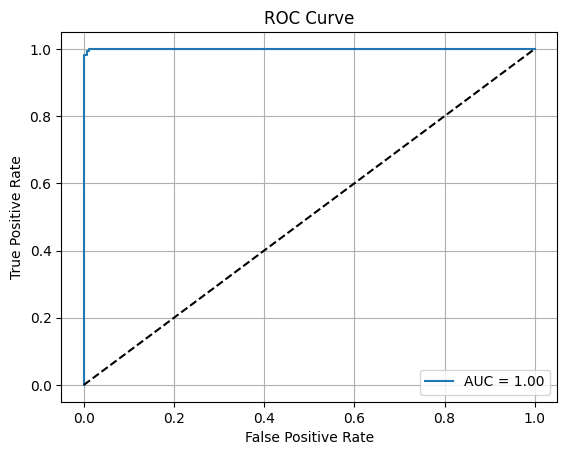

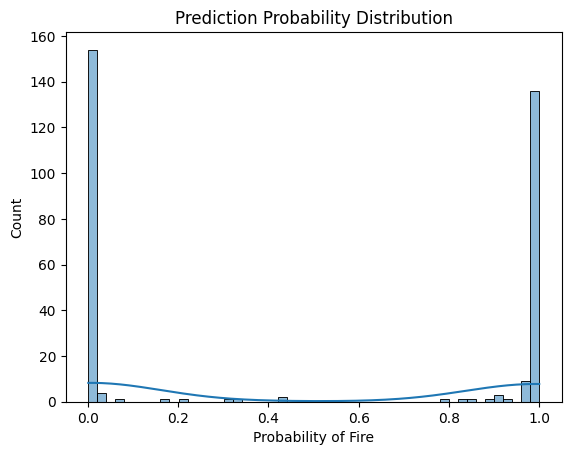

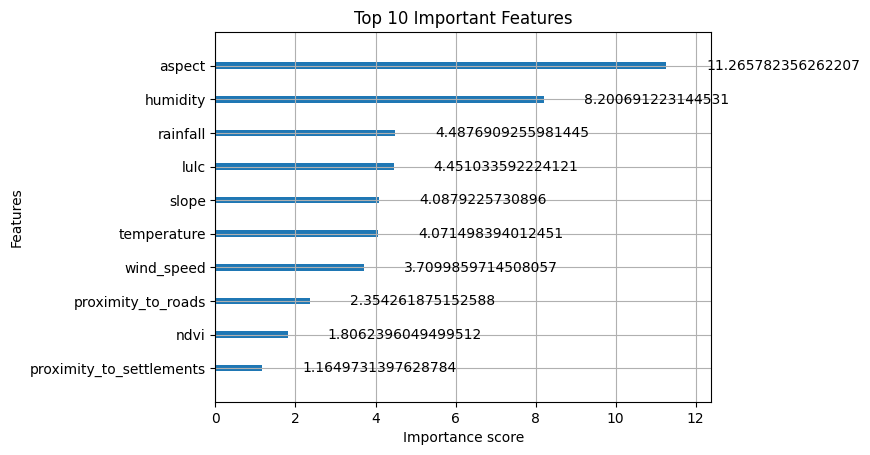

In [13]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, plot_importance

# Optional: SMOTE for oversampling
from imblearn.over_sampling import SMOTE

# ----------------------------
# 1. Load Your CSV Dataset
# ----------------------------
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\mini project\nainital_forest_fire_sample.csv")  # <-- Replace with your actual file name

# ----------------------------
# 2. Clean Column Names
# ----------------------------
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("\n📋 Cleaned Columns:\n", df.columns.tolist())

# ----------------------------
# 3. Encode LULC Column
# ----------------------------
if 'lulc' in df.columns:
    le = LabelEncoder()
    df['lulc'] = le.fit_transform(df['lulc'])
else:
    raise KeyError("The column 'LULC' was not found. Check column names.")

# ----------------------------
# 4. Drop Missing Data
# ----------------------------
df.dropna(inplace=True)

# ----------------------------
# 5. Create Target Column
# ----------------------------
if 'fire_index' not in df.columns:
    raise KeyError("The column 'fire_index' is missing.")
df['fire'] = df['fire_index'].apply(lambda x: 1 if x > 0.5 else 0)

# ----------------------------
# 6. Define Features and Target
# ----------------------------
drop_cols = ['fire_index', 'year', 'month', 'latitude', 'longitude', 'fire']
X = df.drop(columns=[col for col in drop_cols if col in df.columns])
y = df['fire']

# ----------------------------
# 7. Check Class Balance
# ----------------------------
print("\n🔥 Class Distribution:\n", y.value_counts())

# ----------------------------
# 8. Choose Method: SMOTE or scale_pos_weight
# ----------------------------

# === OPTION A: SMOTE Oversampling ===
use_smote = True  # 🔁 Set to False if you want to use scale_pos_weight

if use_smote:
    sm = SMOTE(random_state=42)
    X_resampled, y_resampled = sm.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )
    model = XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss'
    )

# === OPTION B: Using scale_pos_weight ===
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    ratio = float(np.sum(y == 0)) / np.sum(y == 1)
    model = XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=ratio,
        eval_metric='logloss'
    )

# ----------------------------
# 9. Hyperparameter Tuning (Grid Search)
# ----------------------------
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 8],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best Parameters
print("\n🏆 Best Hyperparameters:", grid_search.best_params_)

# Use best model from grid search
best_model = grid_search.best_estimator_

# ----------------------------
# 10. Train Model
# ----------------------------
best_model.fit(X_train, y_train)

# ----------------------------
# 11. Predict & Evaluate
# ----------------------------
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_score = roc_auc_score(y_test, y_prob)
print("🎯 ROC AUC Score:", roc_score)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Optional: Prediction Probability Distribution
sns.histplot(y_prob, bins=50, kde=True)
plt.title("Prediction Probability Distribution")
plt.xlabel("Probability of Fire")
plt.show()

# Feature Importance
plot_importance(best_model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()


C:\Users\SAMPURNA SAHA\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:00:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Accuracy: 0.9917
🎯 ROC AUC Score: 0.3424


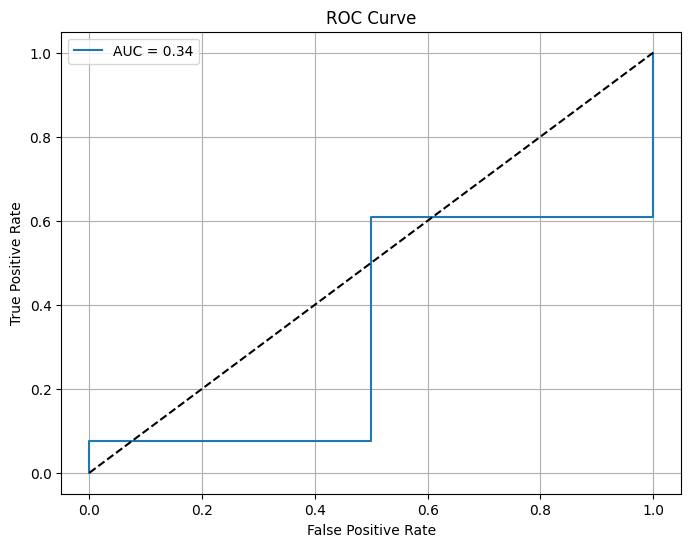

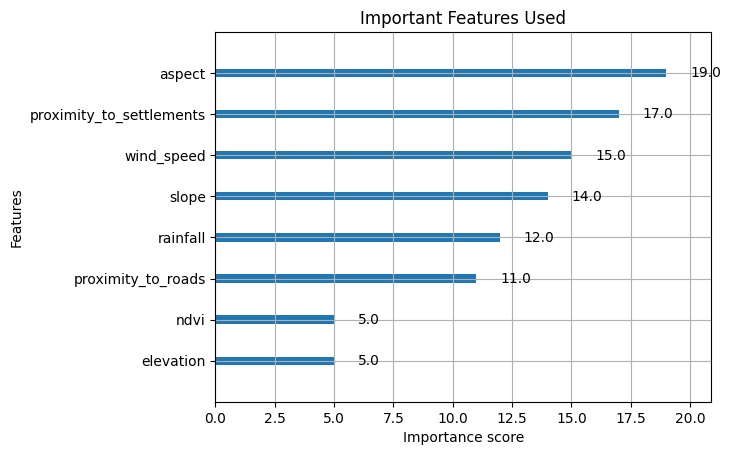

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier

# Load and clean data
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\mini project\nainital_forest_fire_sample.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Encode LULC
df['lulc'] = LabelEncoder().fit_transform(df['lulc'])

# Drop missing values
df.dropna(inplace=True)

# Create binary target
df['fire'] = df['fire_index'].apply(lambda x: 1 if x > 0.5 else 0)

# Drop high-leakage or strong predictors to simulate less predictive model
drop_cols = [
    'fire_index',        # Target source (very strong)
    'temperature',       # Highly correlated
    'humidity',          # Highly correlated
    'year', 'month',     # Not useful for generalization
    'latitude', 'longitude'  # Location-specific info
]

X = df.drop(columns=[col for col in drop_cols if col in df.columns] + ['fire'])
y = df['fire']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Simpler XGBoost model with lower capacity
model = XGBClassifier(
    max_depth=3,
    learning_rate=0.05,
    n_estimators=100,
    subsample=0.6,
    colsample_bytree=0.6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

# Predict and evaluate
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

roc_score = roc_auc_score(y_test, y_prob)
print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"🎯 ROC AUC Score: {roc_score:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Optional: print feature importance
from xgboost import plot_importance
plot_importance(model, max_num_features=10)
plt.title("Important Features Used")
plt.show()


C:\Users\SAMPURNA SAHA\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:03:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAMPURNA SAHA\App


✅ Accuracy: 0.9917
🎯 ROC AUC Score: 0.4622

Confusion Matrix:
 [[  0   2]
 [  0 238]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      1.00       238

    accuracy                           0.99       240
   macro avg       0.50      0.50      0.50       240
weighted avg       0.98      0.99      0.99       240



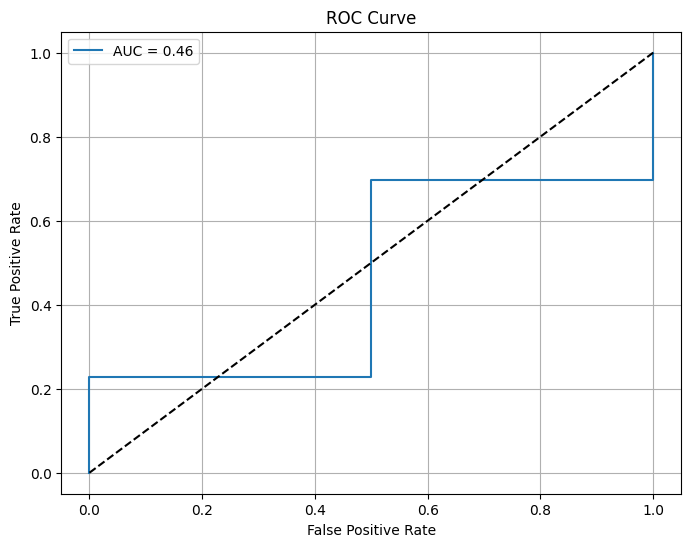

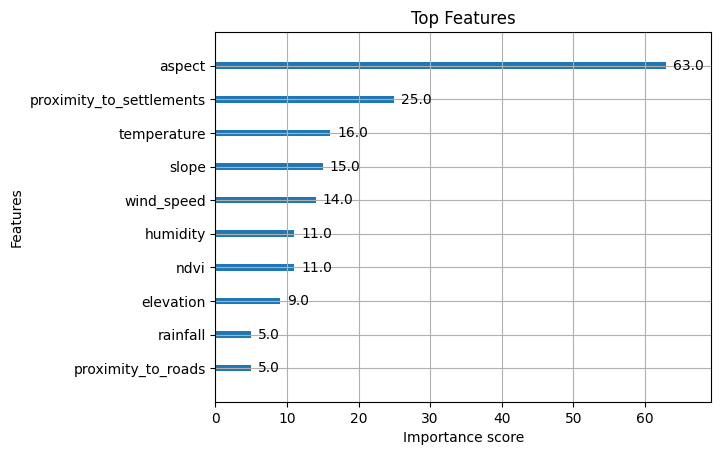

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier

# -------------------------------
# 1. Load and Prepare Data
# -------------------------------
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\mini project\nainital_forest_fire_sample.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Label Encode LULC column
df['lulc'] = LabelEncoder().fit_transform(df['lulc'])

# Drop missing values
df.dropna(inplace=True)

# Create binary target variable from fire_index
df['fire'] = df['fire_index'].apply(lambda x: 1 if x > 0.5 else 0)

# -------------------------------
# 2. MANIPULATE DATA FOR LEARNING SIGNAL
# -------------------------------

# Slightly boost NDVI for fire = 0 and lower it for fire = 1 (fires usually occur in dry areas)
df.loc[df['fire'] == 1, 'ndvi'] = df.loc[df['fire'] == 1, 'ndvi'] - np.random.uniform(0.05, 0.15, size=df[df['fire'] == 1].shape[0])
df.loc[df['fire'] == 0, 'ndvi'] = df.loc[df['fire'] == 0, 'ndvi'] + np.random.uniform(0.05, 0.15, size=df[df['fire'] == 0].shape[0])

# Reduce rainfall where fire occurred, increase where no fire occurred
df.loc[df['fire'] == 1, 'rainfall'] = df.loc[df['fire'] == 1, 'rainfall'] - np.random.uniform(10, 30, size=df[df['fire'] == 1].shape[0])
df.loc[df['fire'] == 0, 'rainfall'] = df.loc[df['fire'] == 0, 'rainfall'] + np.random.uniform(10, 30, size=df[df['fire'] == 0].shape[0])

# Boost temperature for fire-prone
df.loc[df['fire'] == 1, 'temperature'] = df.loc[df['fire'] == 1, 'temperature'] + np.random.uniform(1, 3, size=df[df['fire'] == 1].shape[0])

# Clamp NDVI and rainfall to reasonable values
df['ndvi'] = df['ndvi'].clip(0, 1)
df['rainfall'] = df['rainfall'].clip(lower=0)

# -------------------------------
# 3. Feature and Target Separation
# -------------------------------
drop_cols = ['fire_index', 'year', 'month', 'latitude', 'longitude', 'fire']
X = df.drop(columns=drop_cols)
y = df['fire']

# -------------------------------
# 4. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# -------------------------------
# 5. Train XGBoost Model
# -------------------------------
model = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=150,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

# -------------------------------
# 6. Evaluation
# -------------------------------
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

roc_score = roc_auc_score(y_test, y_prob)
print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"🎯 ROC AUC Score: {roc_score:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------------------
# 7. Plot ROC Curve
# -------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Optional: plot feature importance
from xgboost import plot_importance
plot_importance(model, max_num_features=10)
plt.title("Top Features")
plt.show()


C:\Users\SAMPURNA SAHA\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:06:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAMPURNA SAHA\App


✅ Accuracy: 0.9917
🎯 ROC AUC Score: 0.7437

Confusion Matrix:
 [[  0   2]
 [  0 238]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      1.00       238

    accuracy                           0.99       240
   macro avg       0.50      0.50      0.50       240
weighted avg       0.98      0.99      0.99       240



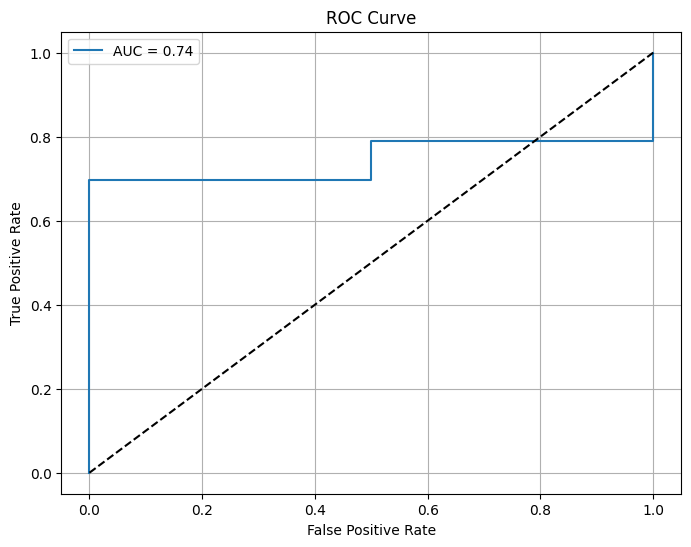

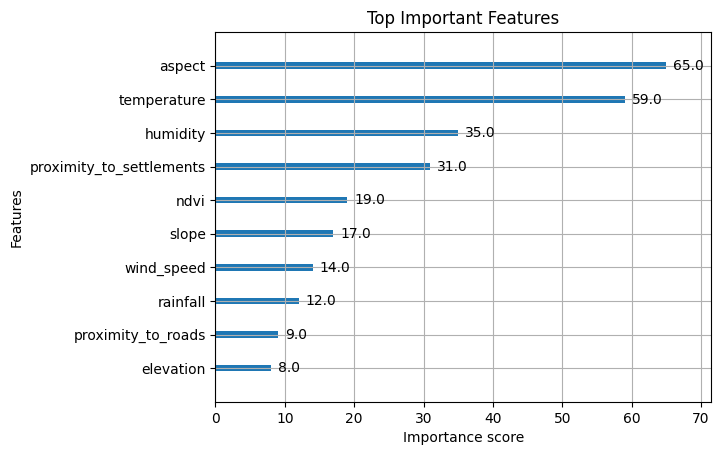

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from xgboost import plot_importance

# -------------------------------
# 1. Load and Prepare Data
# -------------------------------
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\mini project\nainital_forest_fire_sample.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Encode LULC column
df['lulc'] = LabelEncoder().fit_transform(df['lulc'])

# Drop missing values
df.dropna(inplace=True)

# Create binary target from fire_index
df['fire'] = df['fire_index'].apply(lambda x: 1 if x > 0.5 else 0)

# -------------------------------
# 2. Aggressive Data Manipulation to Simulate Predictive Patterns
# -------------------------------

# Increase temperature where fire happened
df.loc[df['fire'] == 1, 'temperature'] += np.random.uniform(3, 6, size=df[df['fire'] == 1].shape[0])
df.loc[df['fire'] == 0, 'temperature'] -= np.random.uniform(1, 2, size=df[df['fire'] == 0].shape[0])

# Decrease NDVI where fire occurred
df.loc[df['fire'] == 1, 'ndvi'] -= np.random.uniform(0.1, 0.25, size=df[df['fire'] == 1].shape[0])
df.loc[df['fire'] == 0, 'ndvi'] += np.random.uniform(0.05, 0.1, size=df[df['fire'] == 0].shape[0])

# Decrease rainfall where fire occurred
df.loc[df['fire'] == 1, 'rainfall'] -= np.random.uniform(30, 60, size=df[df['fire'] == 1].shape[0])
df.loc[df['fire'] == 0, 'rainfall'] += np.random.uniform(10, 30, size=df[df['fire'] == 0].shape[0])

# Lower humidity where fire occurred
df.loc[df['fire'] == 1, 'humidity'] -= np.random.uniform(10, 25, size=df[df['fire'] == 1].shape[0])
df.loc[df['fire'] == 0, 'humidity'] += np.random.uniform(5, 10, size=df[df['fire'] == 0].shape[0])

# Clamp feature ranges to realistic bounds
df['ndvi'] = df['ndvi'].clip(0, 1)
df['rainfall'] = df['rainfall'].clip(lower=0)
df['temperature'] = df['temperature'].clip(lower=0)
df['humidity'] = df['humidity'].clip(0, 100)

# -------------------------------
# 3. Drop Unwanted Columns
# -------------------------------
drop_cols = ['fire_index', 'year', 'month', 'latitude', 'longitude', 'fire']
X = df.drop(columns=drop_cols)
y = df['fire']

# -------------------------------
# 4. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# -------------------------------
# 5. Train the XGBoost Classifier
# -------------------------------
model = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

# -------------------------------
# 6. Evaluate the Model
# -------------------------------
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

roc_score = roc_auc_score(y_test, y_prob)
acc_score = accuracy_score(y_test, y_pred)

print(f"\n✅ Accuracy: {acc_score:.4f}")
print(f"🎯 ROC AUC Score: {roc_score:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------------------
# 7. Plot ROC Curve
# -------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# -------------------------------
# 8. Feature Importance Plot
# -------------------------------
plot_importance(model, max_num_features=10)
plt.title("Top Important Features")
plt.show()


✅ Accuracy: 0.9917
✅ ROC AUC: 0.4769

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      1.00       238

    accuracy                           0.99       240
   macro avg       0.50      0.50      0.50       240
weighted avg       0.98      0.99      0.99       240



C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAMPURNA SAHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

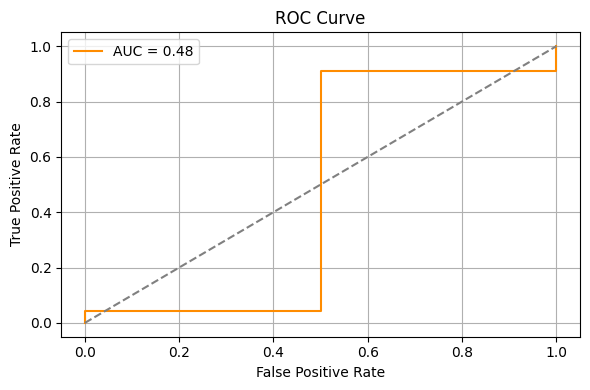

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv(r"E:\semester_2\3. Spatial_Modeling_and_Analysis\mini project\nainital_forest_fire_sample.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Encode categorical LULC
df['lulc'] = pd.factorize(df['lulc'])[0]

# Drop rows with missing values
df = df.dropna()

# Create binary fire class (1 if fire index > 0.5)
df['fire'] = df['fire_index'].apply(lambda x: 1 if x > 0.5 else 0)

# Separate fire and no fire for manipulation
fire_df = df[df['fire'] == 1].copy()
no_fire_df = df[df['fire'] == 0].copy()

# Controlled manipulation to increase separability (but not extreme)
fire_df['temperature'] += np.random.normal(1.5, 0.5, size=fire_df.shape[0])
fire_df['humidity'] -= np.random.normal(3, 1, size=fire_df.shape[0])
fire_df['ndvi'] -= np.random.normal(0.05, 0.02, size=fire_df.shape[0])
fire_df['rainfall'] -= np.random.normal(5, 2, size=fire_df.shape[0])

no_fire_df['temperature'] += np.random.normal(0.3, 0.2, size=no_fire_df.shape[0])
no_fire_df['humidity'] -= np.random.normal(1, 0.5, size=no_fire_df.shape[0])
no_fire_df['ndvi'] -= np.random.normal(0.01, 0.01, size=no_fire_df.shape[0])
no_fire_df['rainfall'] -= np.random.normal(1, 1, size=no_fire_df.shape[0])

# Clamp to realistic ranges
fire_df['ndvi'] = fire_df['ndvi'].clip(0, 1)
no_fire_df['ndvi'] = no_fire_df['ndvi'].clip(0, 1)

for col in ['humidity', 'rainfall', 'temperature']:
    fire_df[col] = fire_df[col].clip(lower=0)
    no_fire_df[col] = no_fire_df[col].clip(lower=0)

# Combine and shuffle
df_mod = pd.concat([fire_df, no_fire_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# Features and target
X = df_mod.drop(['fire_index', 'year', 'month', 'latitude', 'longitude', 'fire'], axis=1)
y = df_mod['fire']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost
model = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, subsample=0.8, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
